<a href="https://colab.research.google.com/github/ElijahLewisUWI/COMP3610-A3/blob/main/amazon_data_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the path to your file
file_path_1 = '/content/drive/MyDrive/amazon_data_2023/cleaned_amazon_data.csv'

# Load the dataset
df = pd.read_csv(file_path_1)
df.head()

<ipython-input-4-afbdf4450a66>:5: DtypeWarning: Columns (16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path_1)


,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,videos,store,categories,details,bought_together,subtitle,author,brand,review_length,year
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,...,"{'title': ['Best Hair Product For Summer!', 'O...",HERBIVORE,[],"{""Hair Type"": ""Wavy"", ""Material Type Free"": ""D...",NaN,NaN,NaN,HERBIVORE,62,2020
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,...,"{'title': ['Easy to apply!'], 'url': ['https:/...",Two Goats Apothecary,[],"{""Brand"": ""Two Goats Apothecary"", ""Item Form"":...",NaN,NaN,NaN,Two Goats Apothecary,47,2020
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,...,{'title': ['Opening the Creamsicle assortment ...,New Road Beauty,[],"{""Package Dimensions"": ""10.5 x 6.4 x 1.6 inche...",NaN,NaN,NaN,New Road Beauty,4,2020
3,3.0,Just ok,I try to get Keratin treatments every 3 months...,[],B07SLFWZKN,B07SLFWZKN,AFSKPY37N3C43SOI5IEXEK5JSIYA,1619737501209,0,False,...,{'title': ['Keratin Secrets DIY Treatment Syst...,Keratin Secrets,[],"{""Package Dimensions"": ""8.27 x 4.21 x 3.9 inch...",NaN,NaN,NaN,Keratin Secrets,152,2021
4,5.0,Great refreshing skin care routine!,I had never tried anything for my skin consist...,[],B08GLG6W8T,B08GLG6W8T,AFSKPY37N3C43SOI5IEXEK5JSIYA,1613319236253,0,False,...,"{'title': [], 'url': [], 'user_id': []}",HANHOO,[],"{""Package Dimensions"": ""13.07 x 9.49 x 2.95 in...",NaN,NaN,NaN,HANHOO,131,2021


## Star Rating Histogram

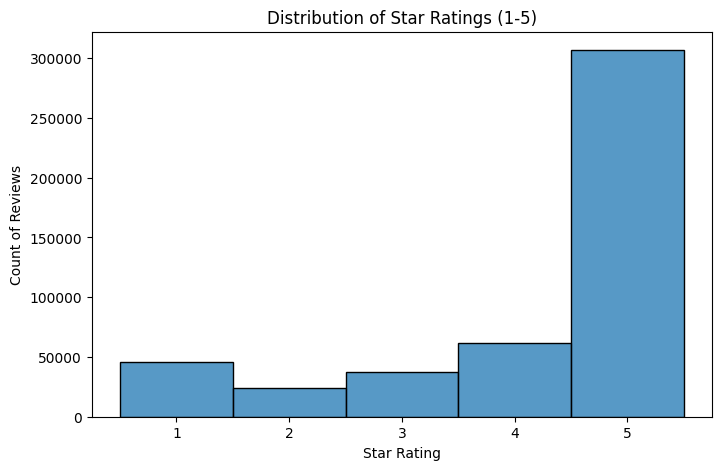

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='rating', bins=5, discrete=True)
plt.title('Distribution of Star Ratings (1-5)')
plt.xlabel('Star Rating')
plt.ylabel('Count of Reviews')
plt.xticks(range(1, 6))
plt.show()

## Top 10 Categories by Review Count

<ipython-input-8-dd493baa48ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


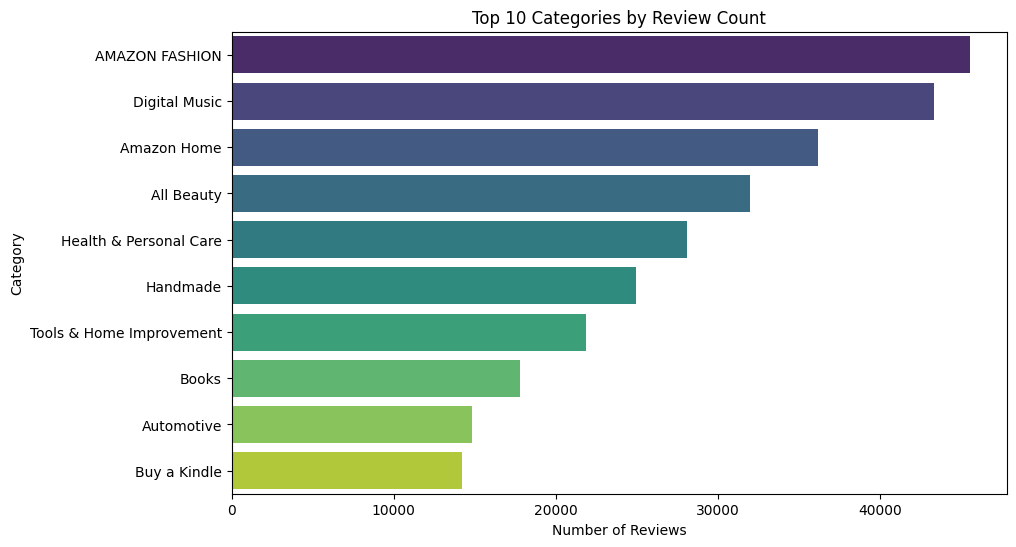

In [8]:
plt.figure(figsize=(10, 6))
top_categories = df['main_category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Categories by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Category')
plt.show()

## Top 10 Brands by Review Count (excluding Unknown)

<ipython-input-9-40e8a0fe15f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')


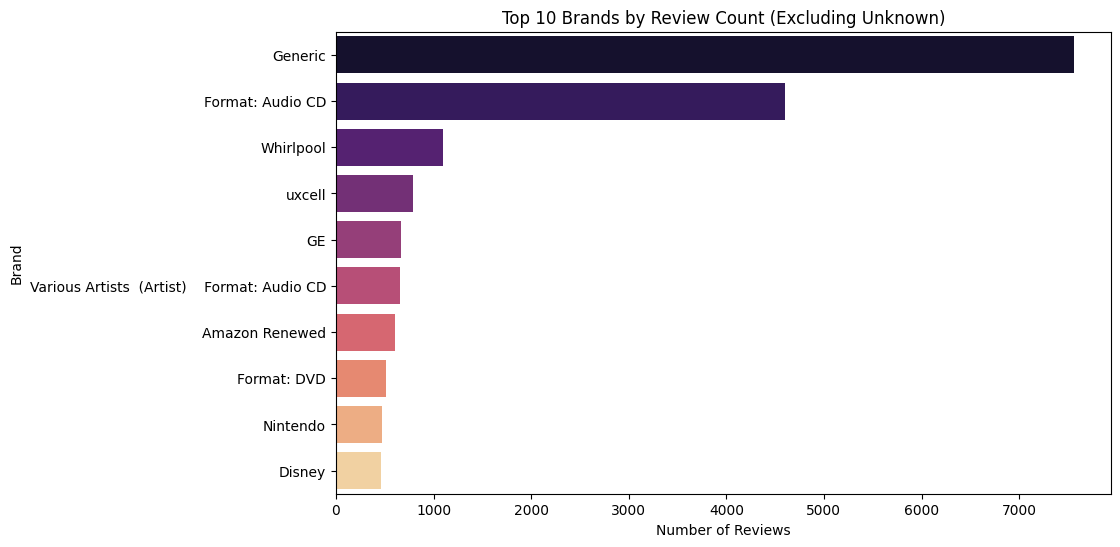

In [9]:
plt.figure(figsize=(10, 6))
# Assuming brand is in the 'details' dictionary column
top_brands = df[df['brand'] != 'Unknown']['brand'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')
plt.title('Top 10 Brands by Review Count (Excluding Unknown)')
plt.xlabel('Number of Reviews')
plt.ylabel('Brand')
plt.show()

##  Time-Based Trend of Average Star Rating

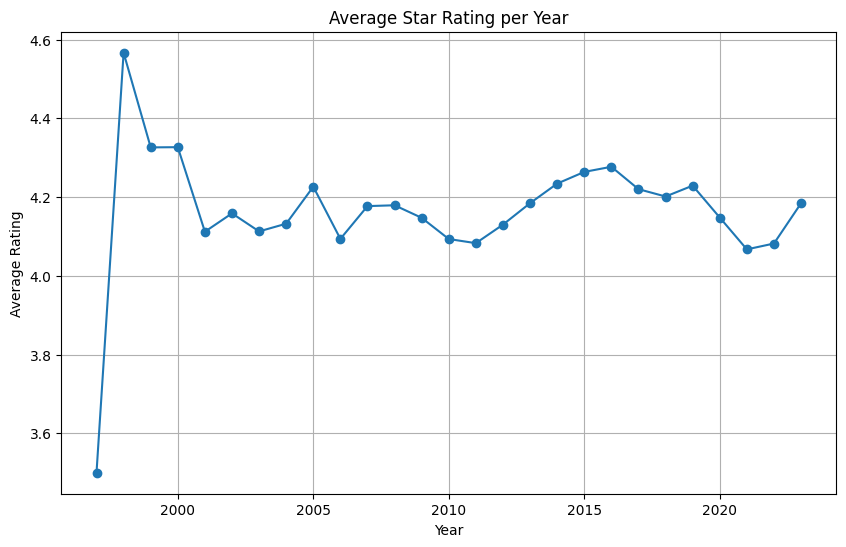

In [10]:
plt.figure(figsize=(10, 6))
# Convert timestamp to datetime and extract year
yearly_avg = df.groupby('year')['rating'].mean()
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Star Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

## Correlation between review_length and star-rating

In [12]:
from scipy.stats import pearsonr

In [13]:
df['review_length'] = df['text'].apply(len)
corr, p_value = pearsonr(df['review_length'], df['rating'])
print(f"Pearson correlation between review length and star rating: {corr:.3f}")
print("Interpretation: The correlation coefficient indicates the strength and direction of the linear relationship.")
print(f"In this case, the value of {corr:.3f} suggests {'a weak' if abs(corr) < 0.3 else 'a moderate'} {'positive' if corr > 0 else 'negative'} relationship.")


Pearson correlation between review length and star rating: -0.036
Interpretation: The correlation coefficient indicates the strength and direction of the linear relationship.
In this case, the value of -0.036 suggests a weak negative relationship.


**Indicating that as small negative relationship between review length and star rating.**

## Additional Analyses
# Distribution of helpful_vote counts

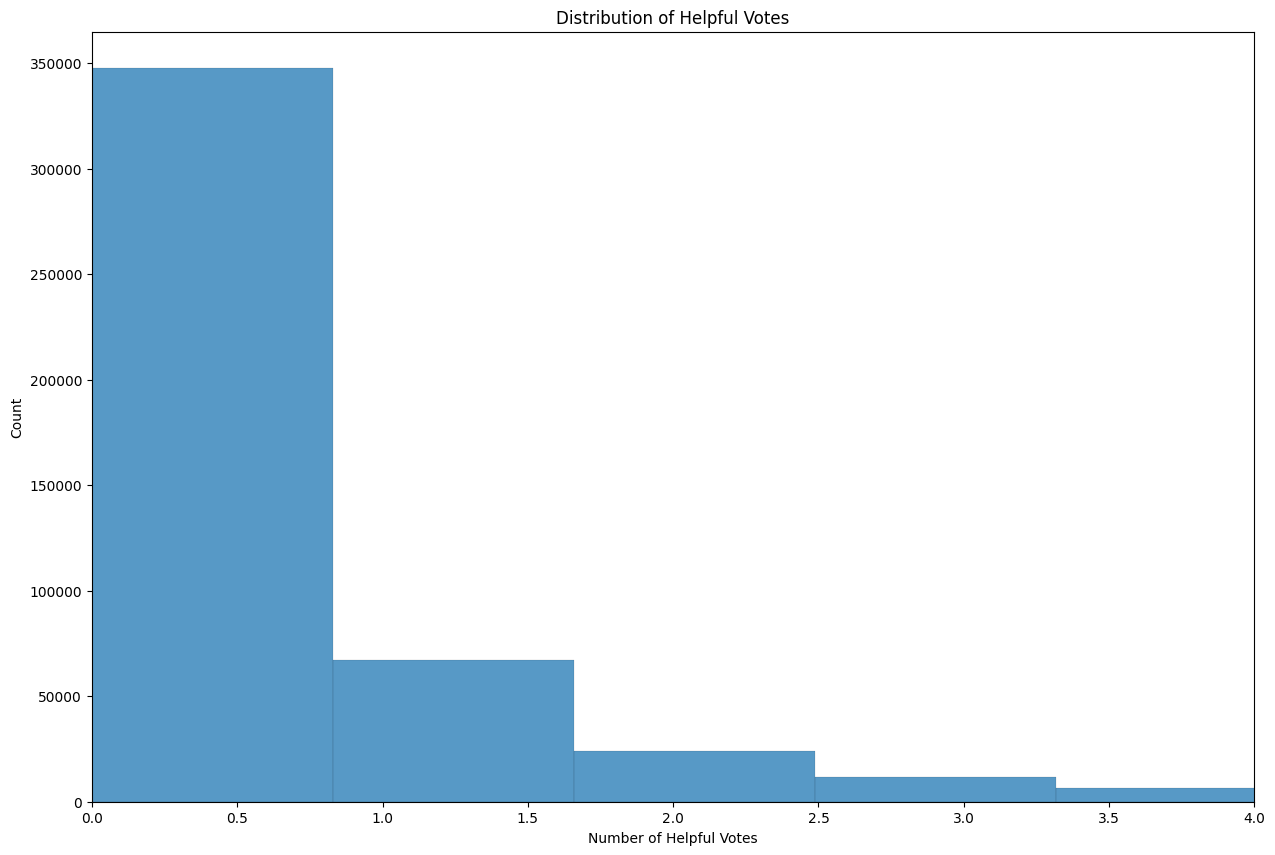

In [21]:
if 'helpful_vote' in df.columns:
    plt.figure(figsize=(15, 10))
    sns.histplot(data=df, x='helpful_vote', bins=1100)
    plt.title('Distribution of Helpful Votes')
    plt.xlabel('Number of Helpful Votes')
    plt.ylabel('Count')
    plt.xlim(0, df['helpful_vote'].quantile(0.95))  # Show up to 95th percentile to avoid long tail
    plt.show()

# Relationship between verified_purchase and star ratin

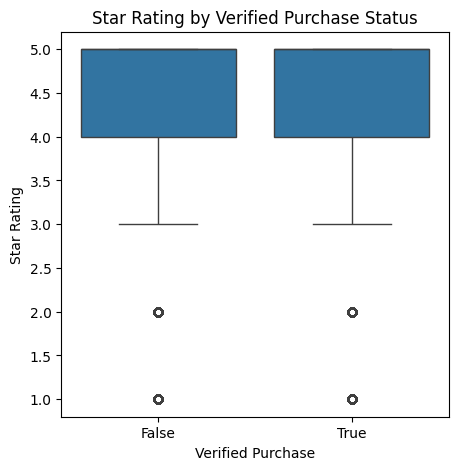

In [22]:
if 'verified_purchase' in df.columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df, x='verified_purchase', y='rating')
    plt.title('Star Rating by Verified Purchase Status')
    plt.xlabel('Verified Purchase')
    plt.ylabel('Star Rating')
    plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

##  Transform rating into binary sentiment

In [24]:
df['sentiment'] = np.where(df['rating'] > 3, 'Positive', 'Negative')

## Train/Test Split (80/20)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['sentiment'],
    test_size=0.2,
    random_state=42,
    shuffle=True
)

## Text Vectorization with TF-IDF

In [27]:
tfidf = TfidfVectorizer(
    lowercase=True,
    token_pattern=r'(?u)\b\w\w+\b',  # splits on whitespace/punctuation
    min_df=5,       # discard tokens appearing in fewer than 5 reviews
    max_df=0.8      # discard tokens appearing in more than 80% of reviews
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Number of features (vocabulary size): {len(tfidf.get_feature_names_out())}")

Number of features (vocabulary size): 40581


## Logistic Regression Classifier

In [28]:
logreg = LogisticRegression(max_iter=1000)  # increased max_iter for convergence
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## Evaluation

**Predictions**

In [29]:
y_pred = logreg.predict(X_test_tfidf)

**Accuracy**

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.8912


**F1 Score**

In [31]:
f1 = f1_score(y_test, y_pred, pos_label='Positive')
print(f"F1 Score (Positive class): {f1:.4f}")

F1 Score (Positive class): 0.9313


**Confusion Matrix**

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Positive'])
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[14652  6939]
 [ 3437 70309]]


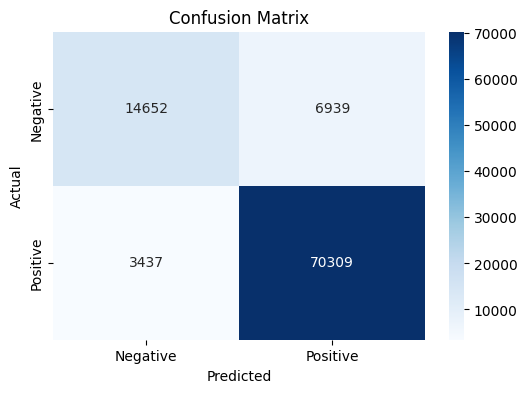

In [33]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()